import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline #enables inline plotting mode)
from sklearn.preprocessing import LabelEncoder #for encoding, converts categorical labels(texts or strings) into numerics
from sklearn.model_selection import train_test_split #for train test splitting
from sklearn.tree import DecisionTreeClassifier #for decision tree object
from sklearn.metrics import Classification_report, confusion_matrix #for checking testing results
from sklearn.tree import plot_tree #for visualizing tree.

In [6]:
import matplotlib.pyplot as plt
if True:
    print("Matplotlib is available")
else:
    print("Matplotlib not available")

Matplotlib is available


In [11]:
#reading the data
iris = sns.load_dataset('iris')

In [12]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
#Exploring the dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
iris.shape

(150, 5)

In [19]:
iris.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [25]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [26]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

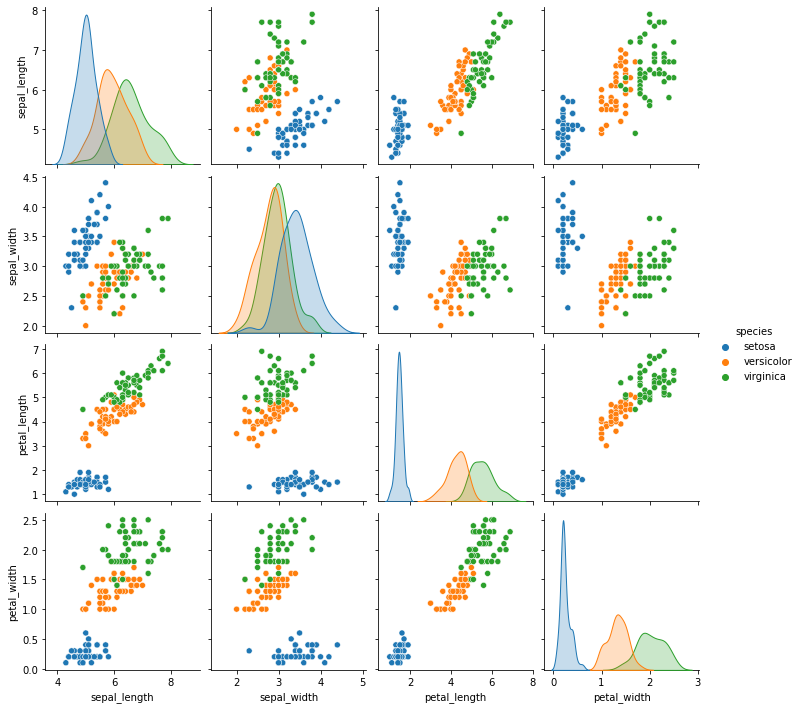

In [27]:
sns.pairplot(data=iris, hue='species')

<AxesSubplot:>

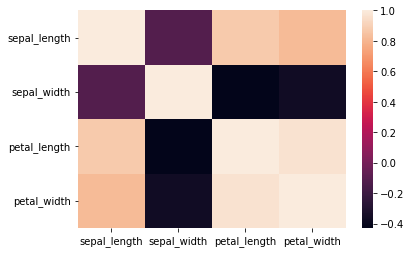

In [28]:
#to check for correlation
sns.heatmap(iris.corr())

array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

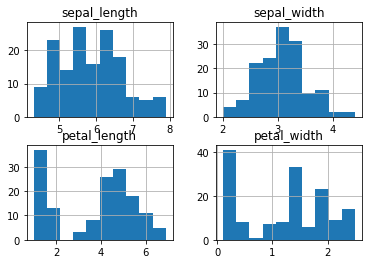

In [29]:
iris.hist()

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

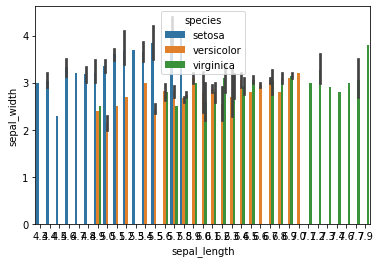

In [33]:
sns.barplot(x='sepal_length',y='sepal_width', hue='species', data=iris)

In [52]:
#We then define the independent/Features (X) and the dependent/target variables (Y),
Y= iris['species']
X = iris.drop('species', axis=1)

In [53]:
Y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [36]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [54]:
#We need to change the target/dependent variable to numerical , since it is categorical. We use label encoding, since the computer understands numbers not texts
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
Y= le.fit_transform(Y)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [56]:
#We then split the data into train and test sizes, at an 80:20 ratio
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size =0.2, random_state =42)

In [58]:
#Defining the decision tree and fit in the model in the train dataset
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier()
dtree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [59]:
#We then predict the values of test data
from sklearn.metrics import classification_report
Y_pred = dtree.predict(X_test)
print('Classification report - \n', classification_report(Y_test,Y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [65]:
Y_pred= dtree.predict(X_test)
from sklearn.metrics import classification_report
classification_report(Y_pred,Y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       1.00      1.00      1.00         9\n           2       1.00      1.00      1.00        11\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'

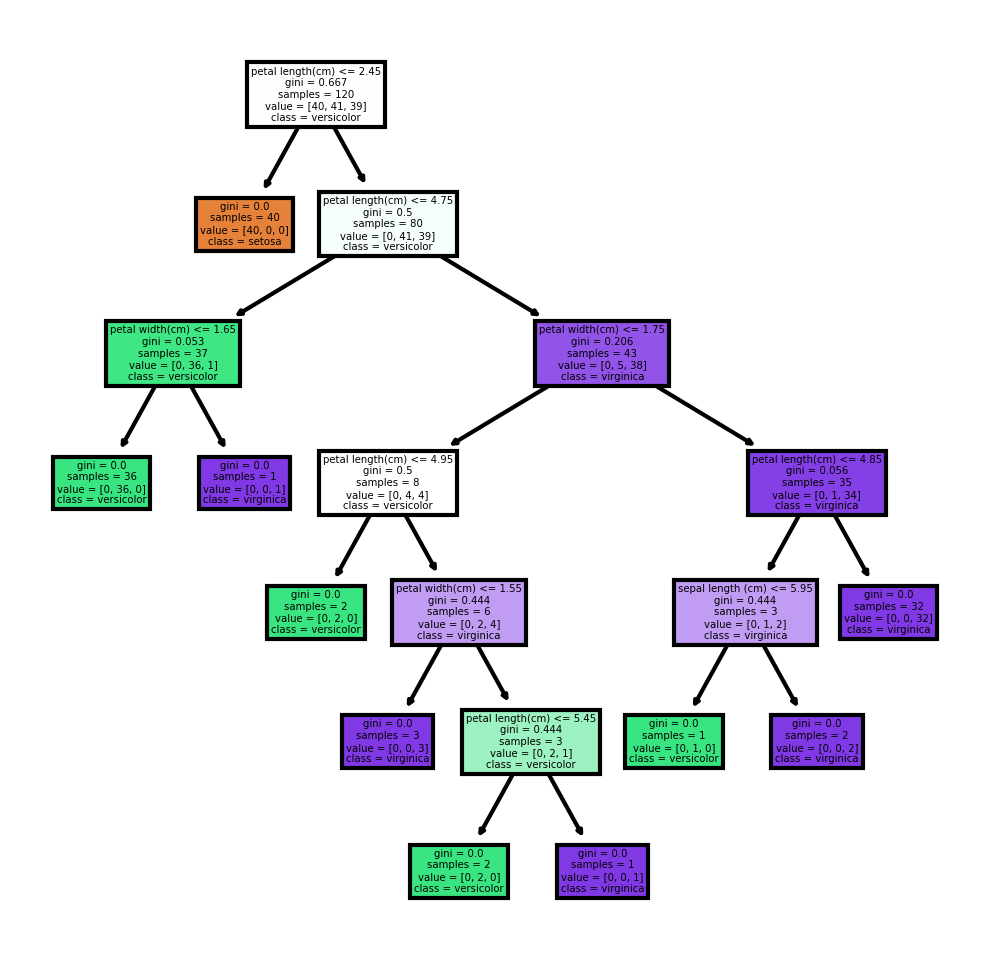

In [66]:
from sklearn import tree
fn=['sepal length (cm)','sepal with (cm)','petal length(cm)','petal width(cm)']
cn=['setosa','versicolor','virginica']
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(dtree,
              feature_names = fn,
              class_names =cn,
              filled = True);
fig.savefig('imagename.png')